<a href="https://colab.research.google.com/github/aman9213/CS6910-Assignment1/blob/master/assignment1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tqdm import tqdm
from keras.datasets import fashion_mnist
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.metrics import  confusion_matrix
import warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install wandb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.1/189.1 KB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.9 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=115d5f87c03879fd0b9279a403a88508fffba331bc8c01d4764d3e38443b88a0
  Stored in directory: /root/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools


### Loading the fashion-mnist data set

In [ ]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [ ]:
print("shape of data:",train_X.shape)
print(train_y)
print(test_y)

shape of data: (60000, 28, 28)
[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


# Q1.ploting sample images from each class 

In [ ]:

items,indices=np.unique(train_y,return_index=True)
print(indices)
print(items)
n_classes=len(items)
print(n_classes)

[ 1 16  5  3 19  8 18  6 23  0]
[0 1 2 3 4 5 6 7 8 9]
10


<Figure size 720x504 with 0 Axes>

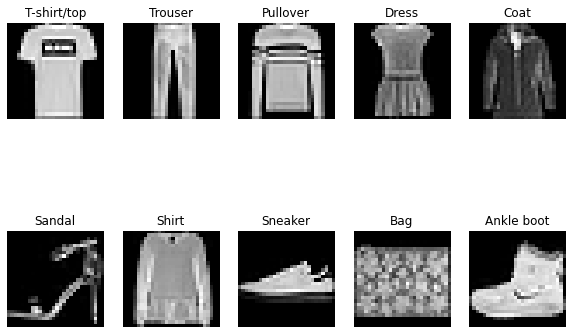

In [ ]:
label=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 7))

rows=2
columns=5
fig = plt.figure(figsize=(10, 7))

for i,j in enumerate(indices):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(train_X[j],cmap ="gray")
        plt.axis('off')
        plt.title(label[i])


 logging the image to the wandb

In [ ]:
import wandb


In [ ]:

!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:

wandb.init(project="DL-assignment1")
items,indices=np.unique(train_y,return_index=True)
labels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

images = []
label = []
for i in (indices):
    images.append(train_X[i])
    label.append(labels[train_y[i]])
wandb.log({"Sample Image": [wandb.Image(img, caption=lbl) for img,lbl in zip(images, label)]})




wandb: Currently logged in as: amanvb-9213. Use `wandb login --relogin` to force relogin


In [ ]:
#splitting train_X into training and validation set
X_train,X_validation=train_test_split(train_X,test_size=0.1,random_state=21,shuffle=True)
print("training data set:",X_train.shape,"\nvalidation data set:",X_validation.shape)
y_train,y_validation=train_test_split(train_y,test_size=0.1,random_state=21,shuffle=True)
print(y_train.shape,y_validation.shape)


training data set: (54000, 28, 28) 
validation data set: (6000, 28, 28)
(54000,) (6000,)


In [ ]:
#making 2-D data matrix
X = np.array([itr.flatten() for itr in X_train])/255.0
X_test=np.array([itr.flatten() for itr in test_X])/255.0
validation_X=np.array([itr.flatten() for itr in X_validation])/255.0
#normalizing pixel


In [ ]:
print(X.shape)
print(X_test.shape)
print(validation_X.shape)

(54000, 784)
(10000, 784)
(6000, 784)


 one hot encoding for 10 different of classes


In [ ]:
#one hot encoding for y_train
y_train_one_hot = np.zeros((y_train.shape[0],10))
for i in range(y_train.shape[0]):
  y_train_one_hot[i,y_train[i]] = 1
#one hot encoding for y_validation
y_validation_one_hot = np.zeros((y_validation.shape[0],10))
for i in range(y_validation.shape[0]):
  y_validation_one_hot[i,y_validation[i]] = 1
#one hot encoding for test_y
test_y_one_hot = np.zeros((test_y.shape[0],10))
for i in range(test_y.shape[0]):
  test_y_one_hot[i,test_y[i]] = 1
print(y_train_one_hot[1])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
input_nodes=X.shape[1]
output_nodes=10


###defining network size

In [ ]:
def network_size(h_layers,h_nodes):
  nodes=[]
  nodes.append(input_nodes)
  for l in range(1,h_layers+1):
    nodes.append(h_nodes)
  nodes.append(output_nodes)

  return nodes

function for parameter initializtion and activaion function

In [ ]:
def init_param(nodes,mode):
  layers=len(nodes)
  
  theta={}
  if mode=='random':
    for i in range(1,layers):
      theta["W"+str(i)]=np.random.randn(nodes[i-1],nodes[i])
      #print(theta["W"+str(i)].shape)
      theta["b"+str(i)]=np.zeros((1,nodes[i]))

  elif mode=='xavier':
    for i in range(1,layers):
      
       #theta["W"+str(i)]= np.random.randn(nodes[i-1],nodes[i])*np.sqrt(2/(nodes[i-1]+nodes[i]))
      theta["W"+str(i)]=np.random.randn(nodes[i-1], nodes[i]) * np.sqrt(2/nodes[i-1])
      theta["b"+str(i)]=np.zeros((1,nodes[i]))
   
  return theta

#activation functions

def sigmoid(x):
  return np.float64(1/(1+(np.exp(-x))))
  
 
def softmax(z):
    #assert len(z.shape) == 1
    s = np.max(z, axis=1)
    s = s[:, np.newaxis] 
    e_x = np.exp(z - s)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis] 
    return e_x / div

def ReLU(x):
  return np.float64(np.maximum(0,x))
def tanh(x):
    return np.float64(np.tanh(x))
def identity(x):
  return np.float64(x)




####derivative of activation function

In [ ]:
def activation_prime(x,activation):
  if activation=='sigmoid':
    return sigmoid(x)*(1-sigmoid(x))
  elif activation=='ReLU':
    #  d=np.zeros_like(x,dtype=np.float64)
    #  d[x>0]=1
     return 1.*(x>0)
  elif activation=='tanh':
    return  (1 - (tanh(x)**2))
  elif activation=='identity':
    x1=np.ones_like(x,dtype=np.float64)
  return x1




In [ ]:
c=[0.1]*10
np.asarray(c)
print(c)

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


###function for forward propagation

In [ ]:
def feed_forward(x,theta,activation):
  
  layers=len(theta)//2
  H=[None]
  A=[]
  H[0]=np.array([x])  
  abc=H[0]
  for i in range(1,layers):
    a=np.dot(abc,theta["W"+str(i)])+theta["b"+str(i)]
    A.append(a)
    if(i!=layers):
      if activation=='sigmoid':
        h=sigmoid(a)
        H.append(h)
      elif activation=='ReLU':
        h=ReLU(a)
        H.append(h)
        
      elif activation=='tanh':
        h=tanh(a)
        H.append(h)
      elif activation=='identity':
        h=identity(a)
        H.append(h)
        
    #else:
    #   y_hat=(softmax(a))
    abc=h
  a=np.dot(abc,theta["W"+str(layers)])+theta["b"+str(layers)]
  y_hat=(softmax(a))
  # if (y_hat-c).all()==0:
  #   print(theta)
  #print(y_hat)
  return y_hat,H,A
    


###function for backpropagation

In [ ]:
def back_prop(y_hat,y,H,A,layers,theta,batch_size,activation,l2):
  # y_hat -- predicted output
  # y ---actual output
  # H--- output of evry hidden layers
  # A--- pre_activation
  # layers- no. of hidden layers
  # theta-- dictionary of weight and bises
  # l2 -- L2 reguralization parameter 
  # dw--- derivative of loss w.r.t weight
  # db derivativee of loss w.r.t biase
  grads={}  ## this is dictionary for storing gradients
  
  delta_A=y_hat-y
  for l in range(layers,0,-1):
    #print(H[l-1])
    grads["dW" + str(l)] = (np.dot(np.array(H[l-1]).T,delta_A)/batch_size)
    grads["dW"+str(l)]+=l2*theta["W"+str(l)]
    grads["db" + str(l)] = (np.sum(delta_A,axis=1,keepdims=True)/batch_size)##<---------
    if l>1:

      delta_A =(np.matmul(delta_A,theta["W"+str(l)].T))*activation_prime(A[l-2],activation) ## A is starting from 0 index thats why l-2
  return grads

       





### update function is use in different optimizers 

In [ ]:
def updatess(nodes):
  layers=len(nodes)
  update={}

  for i in range(1,layers):
    update["W"+str(i)]=np.zeros((nodes[i-1],nodes[i]))
    update["b"+str(i)]=np.zeros((1,nodes[i]))
  return update

### function for re-initializing the weights to 0

In [ ]:
def zero(xyz,layers):
  for l in range(1,layers+1):
    xyz["dW"+str(l)]=0
    xyz["db"+str(l)]=0
  return xyz


### gradient decent function with all optimizers

In [ ]:
def gradient_decent(typee,batch_size,epoch,lr,theta,activation,l2,update,e):
  layers=len(theta)//2
  
  loss=[]
  if typee=='sgd':
    
    # for e in tqdm(range(epoch)):
    xyz={}
      
    xyz=zero(xyz,layers)
    
    for i in range(X.shape[0]):
      y_hat,H,A=feed_forward(X[i],theta,activation)

      del_theta=back_prop(y_hat,y_train_one_hot[i],H,A,layers,theta,batch_size,activation,l2)
        #print("dw5",del_theta["dW"+str(5)])
      for l in range(1,layers+1):
        # if ("dW"+str(l)) in xyz:
        #   xyz["dW"+str(l)]=xyz["dW"+str(l)]+del_theta["dW"+str(l)]
        # else:
        xyz["dW"+str(l)]+=del_theta["dW"+str(l)]
        #print(xyz)
        # if ("db"+str(l)) in xyz:
        #   xyz["db"+str(l)]=xyz["db"+str(l)]+del_theta["db"+str(l)]
        # else:
        xyz["db"+str(l)]+=del_theta["db"+str(l)]
        
      if (i+1)%batch_size==0:
      
        
          #print("dw4",del_theta["dW"+str(4)])
        for l in range(1,layers+1):
          
          theta["W"+str(l)]=theta["W"+str(l)]-lr*xyz["dW"+str(l)]
          
          theta["b"+str(l)]=theta["b"+str(l)]-lr*xyz["db"+str(l)]
        xyz=zero(xyz,layers)
         
      # if e%1==0:      
      #   y_hat,H,A=feed_forward(X,theta,activation)
      #   loss.append((-1.0 * np.sum(np.multiply(y_train_one_hot,np.log(y_hat+0.000000001))))/X.shape[0])
      #   print("epoch:",e+1,loss[-1])
        
          

  elif typee=='mgd':

    m=0.5   ##this is beta for momentum
    last_loss=0
    prv_updates=update
    # for e in range(epoch):
    xyz={}
    xyz=zero(xyz,layers)
    for i in range(X.shape[0]):
      y_hat,H,A=feed_forward(X[i,:],theta,activation)
        #print(y_hat)
      del_theta=back_prop(y_hat,y_train_one_hot[i,:],H,A,layers,theta,batch_size,activation,l2)
      for l in range(1,layers+1):
        # if ("dW"+str(l)) in xyz:
        #   xyz["dW"+str(l)]=xyz["dW"+str(l)]+del_theta["dW"+str(l)]
        # else:
        xyz["dW"+str(l)]+=del_theta["dW"+str(l)]
        # if ("db"+str(l)) in xyz:
        #   xyz["db"+str(l)]=xyz["db"+str(l)]+del_theta["db"+str(l)]
        # else:
        xyz["db"+str(l)]+=del_theta["db"+str(l)]
        
      if (i+1)%batch_size==0:
        for l in range(1,layers+1):
          theta["W"+str(l)]=theta["W"+str(l)]-(m*prv_updates["W"+str(l)]+lr*xyz["dW"+str(l)])
          theta["b"+str(l)]=theta["b"+str(l)]-(m*prv_updates["b"+str(l)]+lr*xyz["db"+str(l)])
          prv_updates["W"+str(l)]=(m*prv_updates["W"+str(l)]+lr*xyz["dW"+str(l)])
          prv_updates["b"+str(l)]=(m*prv_updates["b"+str(l)]+lr*xyz["db"+str(l)])
        xyz=zero(xyz,layers)
      # y_hat,H,A=feed_forward(X,theta,activation)
      # loss.append((-1.0 * np.sum(np.multiply(y_train_one_hot,np.log(y_hat+0.000000001))))/X.shape[0])
      # print("epoch:",e+1,loss[-1])
      

  elif typee=='nag': 
    m=0.5
    theta_look_ahead={}
    prv_updates=update
    # for e in range(epoch):
    xyz={}
    xyz=zero(xyz,layers)
    for i in range(X.shape[0]):
      y_hat,H,A=feed_forward(X[i,:],theta,activation)
      for l in range(1,layers+1):
        theta_look_ahead["W"+str(l)]=theta["W"+str(l)]-m*prv_updates["W"+str(l)]
        theta_look_ahead["b"+str(l)]=theta["b"+str(l)]-m*prv_updates["b"+str(l)]


      del_theta=back_prop(y_hat,y_train_one_hot[i,:],H,A,layers,theta_look_ahead,batch_size,activation,l2)
      for l in range(1,layers+1):

        xyz["dW"+str(l)]+=del_theta["dW"+str(l)]

        xyz["db"+str(l)]+=del_theta["db"+str(l)]

      if (i+1)%batch_size==0:
        for l in range(1,layers+1):
          theta["W"+str(l)]=theta["W"+str(l)]-(m*prv_updates["W"+str(l)]+lr*xyz["dW"+str(l)])
          theta["b"+str(l)]=theta["b"+str(l)]-(m*prv_updates["b"+str(l)]+lr*xyz["db"+str(l)])
          prv_updates["W"+str(l)]=(m*prv_updates["W"+str(l)]+lr*xyz["dW"+str(l)])
          prv_updates["b"+str(l)]=(m*prv_updates["b"+str(l)]+lr*xyz["db"+str(l)])
        xyz=zero(xyz,layers)
      # y_hat,H,A=feed_forward(X,theta,activation)
      # loss.append((-1.0 * np.sum(np.multiply(y_train_one_hot,np.log(y_hat+0.000000001))))/X.shape[0])
      # print("epoch:",e+1,loss[-1])

  elif typee=='rmsprop':
    accumulate_grad=update
    beta=0.5 #
    eps=0.000001
    
    # for e in range(epoch):
      
    xyz={}
    xyz=zero(xyz,layers)
  
    for i in range(X.shape[0]):
      y_hat,H,A=feed_forward(X[i,:],theta,activation)
      del_theta=back_prop(y_hat,y_train_one_hot[i,:],H,A,layers,theta,batch_size,activation,l2)
      for l in range(1,layers+1):
        xyz["dW"+str(l)]+=del_theta["dW"+str(l)]
      
        xyz["db"+str(l)]+=del_theta["db"+str(l)]
      if (i+1)%batch_size==0:
        for l in range(1,layers+1):
          accumulate_grad["W"+str(l)]=beta*accumulate_grad["W"+str(l)]-(1-beta)*(xyz["dW"+str(l)])**2
          accumulate_grad["b"+str(l)]=beta*accumulate_grad["b"+str(l)]-(1-beta)*(xyz["db"+str(l)])**2
          theta["W"+str(l)]=theta["W"+str(l)]-(lr/np.sqrt(abs(accumulate_grad["W"+str(l)])+eps))*xyz["dW"+str(l)]
          theta["b"+str(l)]=theta["b"+str(l)]-(lr/np.sqrt(abs(accumulate_grad["b"+str(l)])+eps))*xyz["db"+str(l)]
        xyz=zero(xyz,layers)
    #  y_hat,H,A=feed_forward(X,theta,activation)
    #   loss.append((-1.0 * np.sum(np.multiply(y_train_one_hot,np.log(y_hat+0.000000001))))/X.shape[0])
    #   print("epoch:",e+1,loss[-1])


  elif typee=='adam':
    updates=update
    momentum=updates.copy()
    momentum_hat=updates.copy()
    accumulate_grad=updates.copy()
    accumulate_grad_hat=updates.copy()
    beta1=0.8
    beta2=0.8
    eps=0.000001
    
    # for e in range(epoch):
    xyz={}
    xyz=zero(xyz,layers)
    for i in range(X.shape[0]):##------------
      y_hat,H,A=feed_forward(X[i,:],theta,activation)
      del_theta=back_prop(y_hat,y_train_one_hot[i,:],H,A,layers,theta,batch_size,activation,l2)
      for l in range(1,layers+1):

        # if ("dW"+str(l)) in xyz:
        #   xyz["dW"+str(l)]=xyz["dW"+str(l)]+del_theta["dW"+str(l)]
        # else:
        xyz["dW"+str(l)]+=del_theta["dW"+str(l)]
        # if ("db"+str(l)) in xyz:
        xyz["db"+str(l)]=xyz["db"+str(l)]+del_theta["db"+str(l)]
        # else:
        #   xyz["db"+str(l)]=del_theta["db"+str
      if (i+1)%batch_size==0:
        for l in range(1,layers+1):
          momentum["W"+str(l)]=beta1*momentum["W"+str(l)]+(1-beta1)*xyz["dW"+str(l)]  ##mt_w
          momentum["b"+str(l)]=beta1*momentum["b"+str(l)]+(1-beta1)*xyz["db"+str(l)]  ##mt_b
          accumulate_grad["W"+str(l)]=beta2*accumulate_grad["W"+str(l)]-(1-beta2)*(xyz["dW"+str(l)])**2 ##v_t
          accumulate_grad["b"+str(l)]=beta2*accumulate_grad["b"+str(l)]-(1-beta2)*(xyz["db"+str(l)])**2 #v_t
          momentum_hat["W"+str(l)]=momentum["W"+str(l)]/(1-np.power(beta1,e+1))  #mt_hat_w
          momentum_hat["b"+str(l)]=momentum["b"+str(l)]/(1-np.power(beta1,e+1))  #mt_hat_b
          accumulate_grad_hat["W"+str(l)]=accumulate_grad["W"+str(l)]/(1-np.power(beta2,e+1)) ##vt_hat_w
          accumulate_grad_hat["b"+str(l)]=accumulate_grad["b"+str(l)]/(1-np.power(beta2,e+1)) ##vt_hat_b
          theta["W"+str(l)]=theta["W"+str(l)]-(lr/np.sqrt(np.abs(accumulate_grad_hat["W"+str(l)]+eps)))*momentum_hat["W"+str(l)]
          theta["b"+str(l)]=theta["b"+str(l)]-(lr/np.sqrt(np.abs(accumulate_grad_hat["b"+str(l)]+eps)))*momentum_hat["b"+str(l)]
        xyz=zero(xyz,layers)
    # y_hat,H,A=feed_forward(X,theta,activation)
    # loss.append((-1.0 * np.sum(np.multiply(y_train_one_hot,np.log(y_hat+0.000000001))))/X.shape[0])
    #   print("epoch:",e+1,loss[-1])


    
  elif type=='nadam':
    updates=update
    momentum=updates.copy()
    momentum_hat=updates.copy()
    accumulate_grad=updates.copy()
    accumulate_grad_hat=updates.copy()
    beta1=0.8
    beta2=0.8
    eps=0.000001
    
    # for e in range(epoch):
    xyz={}
    xyz=zero(xyz,layers)
    for i in range(X.shape[0]):##------------
      y_hat,H,A=feed_forward(X[i,:],theta,activation)
      del_theta=back_prop(y_hat,y_train_one_hot[i,:],H,A,layers,theta,batch_size,activation,l2)
      for l in range(1,layers+1):

        # if ("dW"+str(l)) in xyz:
        #   xyz["dW"+str(l)]=xyz["dW"+str(l)]+del_theta["dW"+str(l)]
        # else:
        xyz["dW"+str(l)]+=del_theta["dW"+str(l)]
        # if ("db"+str(l)) in xyz:
        xyz["db"+str(l)]=xyz["db"+str(l)]+del_theta["db"+str(l)]
          # else:
        #   xyz["db"+str(l)]=del_theta["db"+str(l)]
      if (i+1)%batch_size==0:
        for l in range(1,layers+1):

          momentum["W"+str(l)]=beta1*momentum["W"+str(l)]+(1-beta1)*xyz["dW"+str(l)]  ##mt_w-- is like avg. accumulation of gradient
          momentum["b"+str(l)]=beta1*momentum["b"+str(l)]+(1-beta1)*xyz["db"+str(l)]  ##mt_b-- is like avg accumulation of square of gradient
          accumulate_grad["W"+str(l)]=beta2*accumulate_grad["W"+str(l)]-(1-beta2)*(xyz["dW"+str(l)])**2 ##v_t
          accumulate_grad["b"+str(l)]=beta2*accumulate_grad["b"+str(l)]-(1-beta2)*(xyz["db"+str(l)])**2 #v_t
          momentum_hat["W"+str(l)]=momentum["W"+str(l)]/(1-np.power(beta1,e+1))  #mt_hat_w
          momentum_hat["b"+str(l)]=momentum["b"+str(l)]/(1-np.power(beta1,e+1))  #mt_hat_b
          accumulate_grad_hat["W"+str(l)]=accumulate_grad["W"+str(l)]/(1-np.power(beta2,e+1)) ##vt_hat_w
          accumulate_grad_hat["b"+str(l)]=accumulate_grad["b"+str(l)]/(1-np.power(beta2,e+1)) ##vt_hat_b
          theta["W"+str(l)]=theta["W"+str(l)]-(lr/np.sqrt(np.abs(accumulate_grad_hat["W"+str(l)]+eps)))*(beta1*momentum_hat["W"+str(l)]+((1-beta1)*xyz["dW"+str(l)]/(1-np.power(beta1,e+1))))
          theta["b"+str(l)]=theta["b"+str(l)]-(lr/np.sqrt(np.abs(accumulate_grad_hat["b"+str(l)]+eps)))*(beta1*momentum_hat["b"+str(l)]+((1-beta1)*xyz["db"+str(l)]/(1-np.power(beta1,e+1))))
        xyz=zero(xyz,layers)

    #### you can add new optimizer here
  return theta


  

### Loss and accuracy function

In [ ]:
##cross-entrophy loss function 
def loss_fun(y,y_predl,theta,l2):
  layers=len(theta)//2
  l2_regurlization=0
  loss=(-1.0 * np.sum(np.multiply(y,np.log(y_predl+0.000000001))))/(y.shape[0])
  for l in range(1,layers+1):
    l2_regurlization+=(l2/(2*y.shape[0])*np.sum(np.square(theta["W"+str(l)])))
  loss=loss+l2_regurlization
  return loss

In [ ]:
## Accuracy function
def accuracy(y, y_pred):
  correct=0
  for i in range(y.shape[0]):
    if np.argwhere(y[i])==np.argmax(y_pred[i]):
      correct+=1
  accuracy=(correct/y.shape[0])*100
  return accuracy
  





### wandb sweeping

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: Agent Starting Run: kltogn97 with config:
wandb: 	L2: 0.5
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 32
wandb: 	optimizers: nadam
wandb: 	wt_init: random


run_name: ep_5_hl_5_nodes_32_lr_0.0001_opti_nadam_bsize_16_mode_random_acf_tanh
max__train_accuracy: 10.564814814814815 %
max__validation_accuracy: 10.183333333333334 %
min_train_loss: 18.272326921123803
min_validation_loss: 17.790875997050502


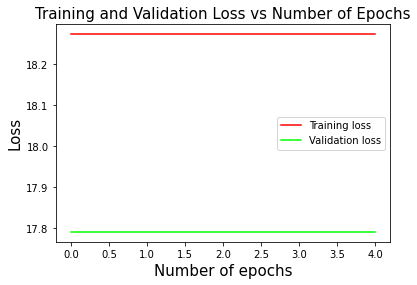

wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


epoch,▁▃▅▆█
train_acc,▁▁▁▁▁
train_loss,▁▁▁▁▁
val_acc,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,4
train_acc,10.56481
train_loss,18.27233
val_acc,10.18333
val_loss,17.79088


wandb: Agent Starting Run: dcjm0sln with config:
wandb: 	L2: 0
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 64
wandb: 	optimizers: sgd
wandb: 	wt_init: xavier


run_name: ep_10_hl_4_nodes_64_lr_0.0001_opti_sgd_bsize_16_mode_xavier_acf_ReLU
max__train_accuracy: 71.5 %
max__validation_accuracy: 71.68333333333334 %
min_train_loss: 9.776583649077738
min_validation_loss: 7.584354963943513


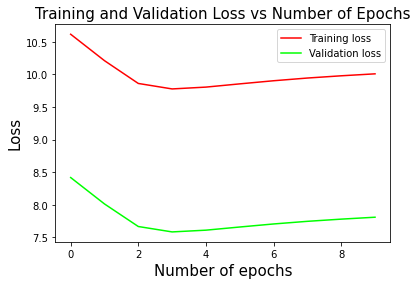

epoch,▁▂▃▃▄▅▆▆▇█
train_acc,▁▆▇▇██████
train_loss,█▅▂▁▁▂▂▂▃▃
val_acc,▁▆▇▇██████
val_loss,█▅▂▁▁▂▂▂▃▃
epoch,9
train_acc,71.5
train_loss,10.008
val_acc,71.68333
val_loss,7.80975


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: s5byrqzw with config:
wandb: 	L2: 0.5
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 32
wandb: 	optimizers: nadam
wandb: 	wt_init: xavier


run_name: ep_5_hl_5_nodes_32_lr_0.0001_opti_nadam_bsize_64_mode_xavier_acf_ReLU
max__train_accuracy: 11.133333333333335 %
max__validation_accuracy: 11.066666666666666 %
min_train_loss: 10.907018038155519
min_validation_loss: 8.716164041149534


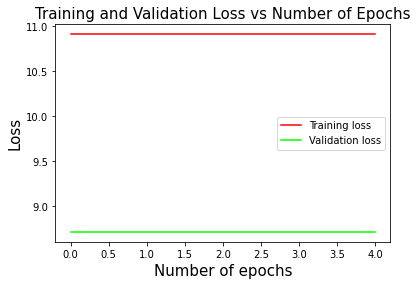

epoch,▁▃▅▆█
train_acc,▁▁▁▁▁
train_loss,▁▁▁▁▁
val_acc,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,4
train_acc,11.13333
train_loss,10.90702
val_acc,11.06667
val_loss,8.71616


wandb: Agent Starting Run: z23xau0b with config:
wandb: 	L2: 0.5
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 4
wandb: 	hidden_layers: 4
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 16
wandb: 	optimizers: adam
wandb: 	wt_init: random


run_name: ep_4_hl_4_nodes_16_lr_0.0001_opti_adam_bsize_16_mode_random_acf_tanh
max__train_accuracy: 16.25925925925926 %
max__validation_accuracy: 15.4 %
min_train_loss: 10.857816134617133
min_validation_loss: 8.698435660773004


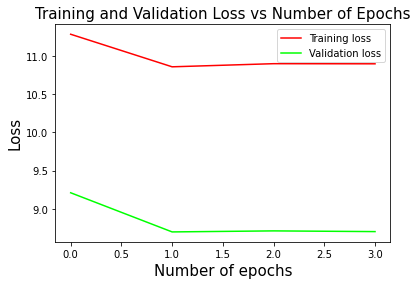

epoch,▁▃▆█
train_acc,▁█▄▆
train_loss,█▁▂▂
val_acc,▁█▅▆
val_loss,█▁▁▁
epoch,3
train_acc,14.37222
train_loss,10.89702
val_acc,13.68333
val_loss,8.70256


wandb: Agent Starting Run: e90u4wxj with config:
wandb: 	L2: 0
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 32
wandb: 	optimizers: nag
wandb: 	wt_init: xavier


run_name: ep_5_hl_4_nodes_32_lr_0.0001_opti_nag_bsize_64_mode_xavier_acf_ReLU
max__train_accuracy: 53.01851851851852 %
max__validation_accuracy: 54.18333333333333 %
min_train_loss: 10.193723963155305
min_validation_loss: 7.996261987437374


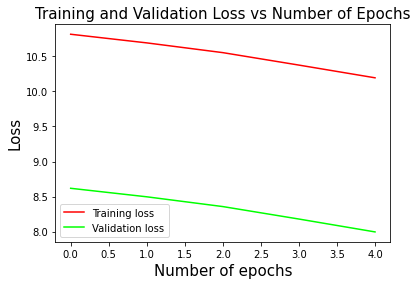

epoch,▁▃▅▆█
train_acc,▁▄▆▇█
train_loss,█▇▅▃▁
val_acc,▁▄▆▆█
val_loss,█▇▅▃▁
epoch,4
train_acc,53.01852
train_loss,10.19372
val_acc,54.18333
val_loss,7.99626


wandb: Agent Starting Run: fczv5fzr with config:
wandb: 	L2: 0
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 32
wandb: 	optimizers: nag
wandb: 	wt_init: xavier


run_name: ep_5_hl_3_nodes_32_lr_0.0001_opti_nag_bsize_32_mode_xavier_acf_ReLU
max__train_accuracy: 67.31481481481481 %
max__validation_accuracy: 67.18333333333332 %
min_train_loss: 9.874525354370984
min_validation_loss: 7.6792073686247875


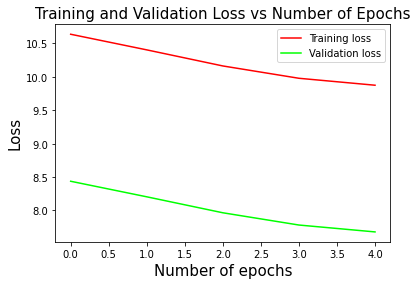

epoch,▁▃▅▆█
train_acc,▁▄▅▇█
train_loss,█▆▄▂▁
val_acc,▁▄▅▇█
val_loss,█▆▄▂▁
epoch,4
train_acc,67.31481
train_loss,9.87453
val_acc,67.18333
val_loss,7.67921


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: tm2m6ifz with config:
wandb: 	L2: 0
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 64
wandb: 	optimizers: nadam
wandb: 	wt_init: xavier


run_name: ep_5_hl_3_nodes_64_lr_0.0001_opti_nadam_bsize_64_mode_xavier_acf_sigmoid
max__train_accuracy: 9.212962962962964 %
max__validation_accuracy: 9.183333333333334 %
min_train_loss: 10.897751662518738
min_validation_loss: 8.700450065088145


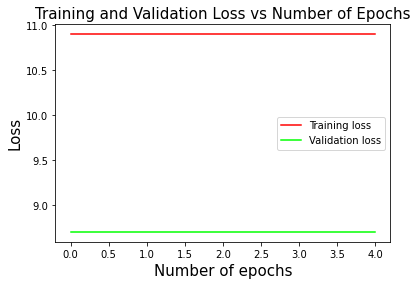

epoch,▁▃▅▆█
train_acc,▁▁▁▁▁
train_loss,▁▁▁▁▁
val_acc,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,4
train_acc,9.21296
train_loss,10.89775
val_acc,9.18333
val_loss,8.70045


wandb: Agent Starting Run: ub7xwpfg with config:
wandb: 	L2: 0
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 32
wandb: 	optimizers: rmsprop
wandb: 	wt_init: xavier


run_name: ep_5_hl_3_nodes_32_lr_0.0001_opti_rmsprop_bsize_64_mode_xavier_acf_ReLU
max__train_accuracy: 71.89444444444445 %
max__validation_accuracy: 72.68333333333334 %
min_train_loss: 10.395104578850795
min_validation_loss: 8.186787216730162


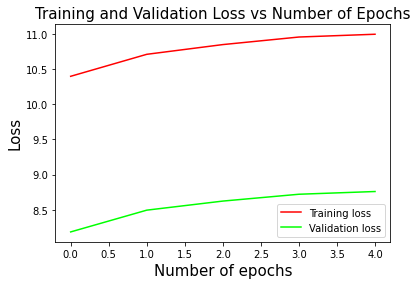

epoch,▁▃▅▆█
train_acc,▁▃▅▇█
train_loss,▁▅▆██
val_acc,▁▂▅▇█
val_loss,▁▅▆██
epoch,4
train_acc,71.89444
train_loss,10.99196
val_acc,72.68333
val_loss,8.76013


wandb: Agent Starting Run: yu1m8p16 with config:
wandb: 	L2: 0
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 32
wandb: 	optimizers: nag
wandb: 	wt_init: xavier


run_name: ep_5_hl_3_nodes_32_lr_0.0001_opti_nag_bsize_64_mode_xavier_acf_tanh
max__train_accuracy: 62.583333333333336 %
max__validation_accuracy: 62.55 %
min_train_loss: 9.947666653900642
min_validation_loss: 7.74962155988395


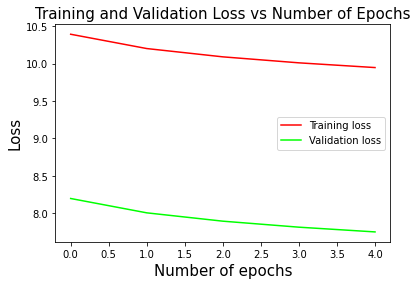

epoch,▁▃▅▆█
train_acc,▁▄▆▇█
train_loss,█▅▃▂▁
val_acc,▁▄▆▇█
val_loss,█▅▃▂▁
epoch,4
train_acc,62.58333
train_loss,9.94767
val_acc,62.55
val_loss,7.74962


wandb: Agent Starting Run: 9t9e1r3i with config:
wandb: 	L2: 0
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 16
wandb: 	optimizers: nag
wandb: 	wt_init: xavier


run_name: ep_5_hl_4_nodes_16_lr_0.0001_opti_nag_bsize_64_mode_xavier_acf_tanh
max__train_accuracy: 59.00925925925926 %
max__validation_accuracy: 59.150000000000006 %
min_train_loss: 10.087712303966926
min_validation_loss: 7.888291193253645


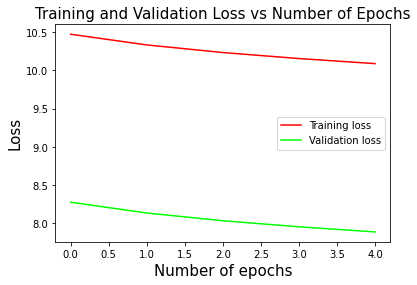

epoch,▁▃▅▆█
train_acc,▁▄▆▇█
train_loss,█▅▄▂▁
val_acc,▁▄▆▇█
val_loss,█▅▄▂▁
epoch,4
train_acc,59.00926
train_loss,10.08771
val_acc,59.15
val_loss,7.88829


wandb: Agent Starting Run: dnsxhgwx with config:
wandb: 	L2: 0
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 4
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 32
wandb: 	optimizers: rmsprop
wandb: 	wt_init: xavier


run_name: ep_4_hl_3_nodes_32_lr_0.0001_opti_rmsprop_bsize_64_mode_xavier_acf_tanh
max__train_accuracy: 83.72962962962963 %
max__validation_accuracy: 83.83333333333334 %
min_train_loss: 9.233781016604958
min_validation_loss: 7.031633473608452


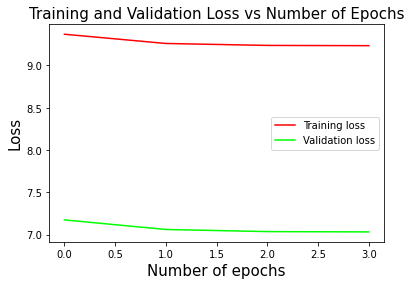

epoch,▁▃▆█
train_acc,▁▅▇█
train_loss,█▂▁▁
val_acc,▁▅▇█
val_loss,█▂▁▁
epoch,3
train_acc,83.72963
train_loss,9.23378
val_acc,83.83333
val_loss,7.03163


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 17vvd70y with config:
wandb: 	L2: 0
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 64
wandb: 	optimizers: nadam
wandb: 	wt_init: xavier


run_name: ep_5_hl_3_nodes_64_lr_0.0001_opti_nadam_bsize_32_mode_xavier_acf_ReLU
max__train_accuracy: 11.424074074074074 %
max__validation_accuracy: 12.45 %
min_train_loss: 10.937061035132247
min_validation_loss: 8.733204474535134


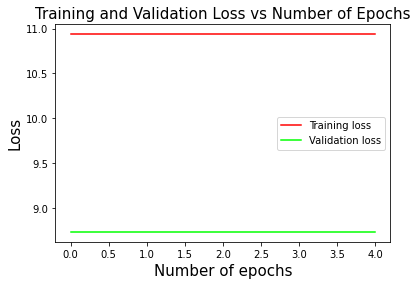

epoch,▁▃▅▆█
train_acc,▁▁▁▁▁
train_loss,▁▁▁▁▁
val_acc,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,4
train_acc,11.42407
train_loss,10.93706
val_acc,12.45
val_loss,8.7332


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: b0ccl5ws with config:
wandb: 	L2: 0
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 32
wandb: 	optimizers: nag
wandb: 	wt_init: xavier


run_name: ep_5_hl_3_nodes_32_lr_0.0001_opti_nag_bsize_64_mode_xavier_acf_tanh
max__train_accuracy: 65.58888888888889 %
max__validation_accuracy: 64.60000000000001 %
min_train_loss: 9.844839025777146
min_validation_loss: 7.653397196078588


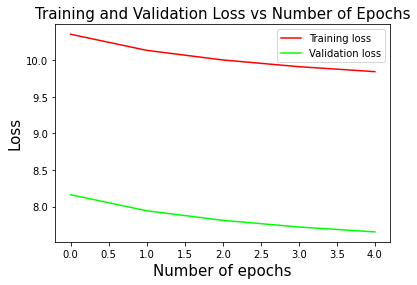

epoch,▁▃▅▆█
train_acc,▁▅▆▇█
train_loss,█▅▃▂▁
val_acc,▁▅▆▇█
val_loss,█▅▃▂▁
epoch,4
train_acc,65.58889
train_loss,9.84484
val_acc,64.6
val_loss,7.6534


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: r4x4e2ff with config:
wandb: 	L2: 0
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 32
wandb: 	optimizers: rmsprop
wandb: 	wt_init: xavier


run_name: ep_10_hl_3_nodes_32_lr_0.0001_opti_rmsprop_bsize_64_mode_xavier_acf_tanh
max__train_accuracy: 85.60555555555555 %
max__validation_accuracy: 85.39999999999999 %
min_train_loss: 9.25548332859949
min_validation_loss: 7.052969941497847


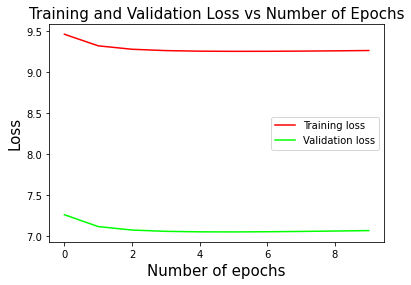

epoch,▁▂▃▃▄▅▆▆▇█
train_acc,▁▄▅▆▆▇▇███
train_loss,█▃▂▁▁▁▁▁▁▁
val_acc,▁▄▅▆▇▇▇███
val_loss,█▃▂▁▁▁▁▁▁▂
epoch,9
train_acc,85.60556
train_loss,9.26553
val_acc,85.4
val_loss,7.06907


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: r5ggazkj with config:
wandb: 	L2: 0
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 32
wandb: 	optimizers: adam
wandb: 	wt_init: xavier


run_name: ep_5_hl_3_nodes_32_lr_0.0001_opti_adam_bsize_64_mode_xavier_acf_tanh
max__train_accuracy: 85.52222222222223 %
max__validation_accuracy: 85.41666666666666 %
min_train_loss: 9.246262804939017
min_validation_loss: 7.045902701265888


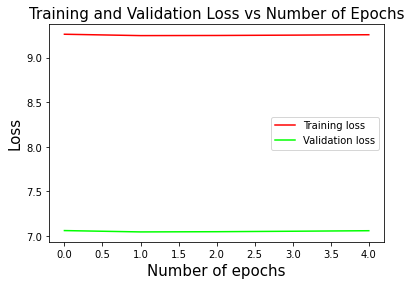

epoch,▁▃▅▆█
train_acc,▁▄▆▇█
train_loss,█▁▂▃▅
val_acc,▁▅▆▇█
val_loss,█▁▂▅▇
epoch,4
train_acc,85.52222
train_loss,9.25604
val_acc,85.41667
val_loss,7.05939


wandb: Agent Starting Run: qoaiffb0 with config:
wandb: 	L2: 0.0005
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 32
wandb: 	optimizers: adam
wandb: 	wt_init: xavier


run_name: ep_10_hl_3_nodes_32_lr_0.0001_opti_adam_bsize_64_mode_xavier_acf_ReLU
max__train_accuracy: 78.29814814814814 %
max__validation_accuracy: 78.53333333333333 %
min_train_loss: 9.60112105450059
min_validation_loss: 7.411585251621012


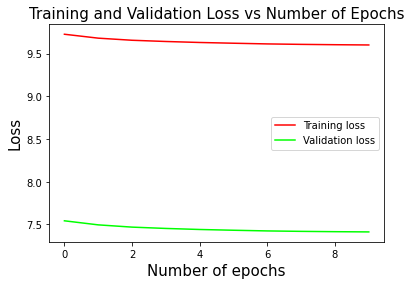

epoch,▁▂▃▃▄▅▆▆▇█
train_acc,▁▆████▇▇▇▇
train_loss,█▅▄▃▃▂▂▁▁▁
val_acc,▁▅███▇▇▇▇▇
val_loss,█▅▄▃▃▂▂▁▁▁
epoch,9
train_acc,77.93333
train_loss,9.60112
val_acc,77.96667
val_loss,7.41159


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: sqlkjkvo with config:
wandb: 	L2: 0
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 16
wandb: 	optimizers: nag
wandb: 	wt_init: xavier


run_name: ep_5_hl_3_nodes_16_lr_0.0001_opti_nag_bsize_64_mode_xavier_acf_tanh
max__train_accuracy: 49.77777777777778 %
max__validation_accuracy: 49.86666666666667 %
min_train_loss: 10.296605106712128
min_validation_loss: 8.09904741297692


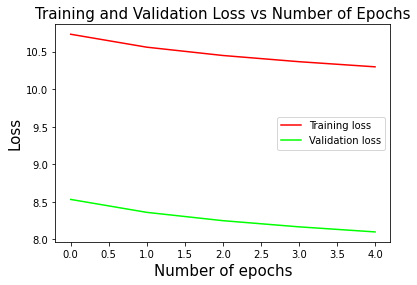

epoch,▁▃▅▆█
train_acc,▁▄▆▇█
train_loss,█▅▃▂▁
val_acc,▁▅▆▇█
val_loss,█▅▃▂▁
epoch,4
train_acc,49.77778
train_loss,10.29661
val_acc,49.86667
val_loss,8.09905


wandb: Agent Starting Run: jexj9mnz with config:
wandb: 	L2: 0
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	epochs: 4
wandb: 	hidden_layers: 4
wandb: 	learning_rate: 0.0001
wandb: 	numbers_neurons: 16
wandb: 	optimizers: rmsprop
wandb: 	wt_init: xavier


run_name: ep_4_hl_4_nodes_16_lr_0.0001_opti_rmsprop_bsize_64_mode_xavier_acf_ReLU


wandb: Ctrl + C detected. Stopping sweep.


Error in callback <function _WandbInit._pause_backend at 0x7fb0fb2b15e0> (for post_run_cell):


BrokenPipeError: ignored

In [ ]:
sweep_configuration={'name':'EE22s037','method':'bayes',
                     'metric':{'name':'val_acc','goal':'maximize'},
                     'parameters':{
                                   'epochs':{'values':[4,5,10]},
                                   'hidden_layers':{'values':[3,4,5]},
                                   'numbers_neurons':{'values':[16,32,64]},
                                   'learning_rate':{'values':[1e-3,1e-4]},
                                   'optimizers':{'values':['sgd','mgd','nag','rmsprop','adam','nadam']},
                                   'batch_size':{'values':[16,32,64]},
                                   'wt_init':{'values':['random','xavier']},
                                   'activation':{'values':['sigmoid','tanh','ReLU']},
                                   'L2':{'values':[0,0.0005,0.5]}
                                   }
    
                     }
#sweep_id=wandb.sweep(sweep=sweep_configuration,entity="amanvb-9213",project='DL-assignment1')
sweep_id="wnsb3wuj"


def tune():
  wandb.init()
  epochs=wandb.config.epochs
  h_layers=wandb.config.hidden_layers
  nodes=wandb.config.numbers_neurons
  lr=wandb.config.learning_rate
  optimizer=wandb.config.optimizers
  batch_size=wandb.config.batch_size
  init_mode=wandb.config.wt_init
  activation=wandb.config.activation
  l2=wandb.config.L2

  run_name="ep_{}_hl_{}_nodes_{}_lr_{}_opti_{}_bsize_{}_mode_{}_acf_{}".format(epochs,h_layers,nodes,lr,optimizer,batch_size,init_mode,activation,l2)
  print("run_name:",run_name)

  train_Loss=[]
  train_Acc=[]
  val_Loss=[]
  val_Acc=[]
  nodes=network_size(h_layers,nodes)
  theta=init_param(nodes,init_mode)
  update=updatess(nodes)
  for e in range(epochs):
    theta=gradient_decent(optimizer,batch_size,epochs,lr,theta,activation,l2,update,e)


    # print('one')
    ## finding loss on training data
    #train_Loss=loss
    # print('two')
    y_predl,H,A=feed_forward(X,theta,activation)
    train_loss=loss_fun(y_train_one_hot,y_predl[0],theta,l2)
    train_Loss.append(train_loss)
    #train accuracy
    y_preda,H,A=feed_forward(X,theta,activation)
    # print('three')
    # print(y_preda[0].shape)
    # print(y_train_one_hot.shape)
    train_acc=accuracy(y_train_one_hot,y_preda[0])
    # print('four')
    train_Acc.append(train_acc)
    # print('five')


  
    ##finding validation loss
    y_pred,H,A=feed_forward(validation_X,theta,activation)
    # print('six')

    val_loss=loss_fun(y_validation_one_hot,y_pred[0],theta,l2)
    # print('seven')
    val_Loss.append(val_loss)
    # print('eight')
        ##validation accuracy
    y_predva,H,A=feed_forward(validation_X,theta,activation)
    val_acc=accuracy(y_validation_one_hot,y_predva[0])
    val_Acc.append(val_acc)
    wandb.log({
            'epoch': e, 
            'train_acc': train_acc,
            'train_loss': train_loss,  
            'val_acc': val_acc, 
            'val_loss': val_loss
          })
  print("max__train_accuracy:",np.max(train_Acc),"%")
  print("max__validation_accuracy:",np.max(val_Acc),"%")
  print("min_train_loss:",np.min(train_Loss))
  print("min_validation_loss:",np.min(val_Loss))
  plt.plot(train_Loss, 'r', label="Training loss")
  plt.plot(val_Loss, 'lime', label="Validation loss")
  plt.title("Training and Validation Loss vs Number of Epochs", size=15)
  plt.xlabel("Number of epochs", size=15)
  plt.ylabel("Loss", size=15)
  plt.legend()
  plt.show()  
  wandb.run.name = run_name
  wandb.run.save()
  wandb.run.finish()
  

#wandb.agent(sweep_id,function=tune,count=10)
sweep_id="wnsb3wuj"
wandb.agent(sweep_id,function=tune,entity="amanvb-9213",project='DL-assignment1')














Training the best model with the above experiment for Calculating test accuracy.

In [ ]:
def tune_best_test():
  
  epochs=5
  h_layers=5
  nodes=64
  lr=0.0001
  optimizer="adam"
  batch_size=64
  init_mode="xavier"
  activation="tanh"
  l2=0



  train_Loss=[]
  train_Acc=[]
  val_Loss=[]
  val_Acc=[]
  nodes=network_size(h_layers,nodes)
  theta=init_param(nodes,init_mode)
  update=updatess(nodes)
  for e in range(epochs):
    theta=gradient_decent(optimizer,batch_size,epochs,lr,theta,activation,l2,update,e)



    ## finding loss on training data

    y_predl,H,A=feed_forward(X,theta,activation)
    train_loss=loss_fun(y_train_one_hot,y_predl[0],theta,l2)
    train_Loss.append(train_loss)
    #train accuracy
    y_preda,H,A=feed_forward(X,theta,activation)
    
    train_acc=accuracy(y_train_one_hot,y_preda[0])
    
    train_Acc.append(train_acc)
    


  
    ##finding validation loss
    y_pred,H,A=feed_forward(validation_X,theta,activation)
  
    val_loss=loss_fun(y_validation_one_hot,y_pred[0],theta,l2)
  
    val_Loss.append(val_loss)

    y_predva,H,A=feed_forward(validation_X,theta,activation)
    val_acc=accuracy(y_validation_one_hot,y_predva[0])
    val_Acc.append(val_acc)

  print("max__train_accuracy:",np.max(train_Acc),"%")
  print("max__validation_accuracy:",np.max(val_Acc),"%")
  print("min_train_loss:",np.min(train_Loss))
  print("min_validation_loss:",np.min(val_Loss))
  
  #y_pred,H,A=feed_forward(X_test,theta,activation)
  #test_acc=accuracy(test_y_one_hot,y_pred[0])
  #print(f"test_accuracy is {test_acc}")
  return theta

theta_best=tune_best_test()



max__train_accuracy: 88.00925925925925 %
max__validation_accuracy: 86.75 %
min_train_loss: 9.187377297695976
min_validation_loss: 6.9973648225015275


Calculating Test Accuracy and Plotting the Confusion Matrix

test_accuracy is 85.76


Text(0.5, 1.0, 'confusion matrix')

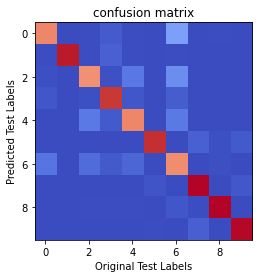

In [ ]:
y_pred,H,A=feed_forward(X_test,theta_best,"tanh")
test_acc=accuracy(test_y_one_hot,y_pred[0])
print(f"test_accuracy is {test_acc}")

test_y_flattened = (test_y.reshape(1, len(test_y))).flatten()

unique_classes = np.unique(test_y_flattened)
total_unique_classes=len(unique_classes)

confusion_matrix = np.zeros((total_unique_classes, total_unique_classes))
y_pred_new=[]
y_pred_=y_pred[0]
for i in range(len(y_pred_)):
  y_pred_new.append(np.argmax(y_pred_[i]))

y_pred_new=np.asarray(y_pred_new)
for j in range(total_unique_classes):
    for i in range(total_unique_classes):
        confusion_matrix[j, i] = np.sum((test_y_flattened == unique_classes[j]) & (y_pred_new == unique_classes[i]))

plt.imshow(confusion_matrix,cmap='coolwarm')
plt.ylabel("Predicted Test Labels")
plt.xlabel("Original Test Labels")
plt.title("confusion matrix")
